# What is a Notebook?

A notebook is a document that contains both **code** and **rich text elements**, such as *figures*, *links*, *equations*, and so on. with using the power of markdown language.

Because of the mix of code and text elements, these documents are the ideal place to bring together an analysis description, and its results, as well as they can be executed perform the data analysis in real time.

## Numerical Computation with NumPy

NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices. NumPy was created in 2005. It is an open source project and you can use it freely. NumPy stands for Numerical Python.

### Creating NumPy Arrays

There are 6 general mechanisms for creating arrays:

##### 1. Conversion from other Python structures (i.e. lists and tuples)

In [1]:
import numpy as np

# 1D array
a1D = np.array((1, 2, 3, 4))
# 2D array
a2D = np.array([[1, 2], [3, 4]])
# 3D array
a3D = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])


a1D


array([1, 2, 3, 4])

In [41]:
# type(a1D)
a1D.shape

(4,)

In [42]:
# reshape 1D array to 2D array
a1D[:, np.newaxis]
# a1D.reshape(4, 1)

array([[1],
       [2],
       [3],
       [4]])

##### 2. Intrinsic NumPy array creation functions (e.g. arange, ones, zeros, etc.)

In [43]:
# range of numbers
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
np.arange(2, 10, dtype=float)

array([2., 3., 4., 5., 6., 7., 8., 9.])

In [45]:
np.arange(2, 3, 0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

In [46]:
# evenly spaced numbers
np.linspace(1.0, 4.0, 6)

array([1. , 1.6, 2.2, 2.8, 3.4, 4. ])

In [47]:
# identity matrix
np.eye(3)
# np.eye(3, 4)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [48]:
# diagonal matrix with diagonal values
np.diag([1, 2, 3])
# np.diag([1, 2, 3], k=1)

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [49]:
# vandermonde matrix
np.vander([1, 2, 3, 4], 2)

array([[1, 1],
       [2, 1],
       [3, 1],
       [4, 1]])

In [50]:
# zeros matrix
# np.zeros((2, 3))
np.zeros(3)

array([0., 0., 0.])

In [51]:
# ones matrix
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [52]:
# random numbers between 0 and 1
np.random.rand(2, 3)

array([[0.10359992, 0.48427202, 0.24738817],
       [0.80460155, 0.05487956, 0.03493362]])

In [53]:
# random integers between 0 and 10
np.random.randint(1, 10, (2, 3))

array([[3, 8, 7],
       [2, 2, 6]])

In [54]:
# random numbers from a normal distribution
np.random.randn(2, 3)

array([[-1.16355691, -1.22023816, -1.64930874],
       [ 0.05563013,  1.18598572, -0.04154109]])

In [55]:
# random numbers from a uniform distribution
# np.random.seed(0)
np.random.uniform(1, 10, (2, 3))

array([[4.78502208, 6.09377428, 6.20406129],
       [1.99789964, 4.82115975, 4.98761224]])

##### 3. Replicating, joining, or mutating existing arrays

In [56]:
a = np.array([1, 2, 3, 4, 5, 6])
b = a[:2]  # create a view of the first two elements
b += 1
# b.base
b, a

(array([2, 3]), array([2, 3, 3, 4, 5, 6]))

In [57]:
# copy gives a new array
a = np.array([1, 2, 3, 4, 5, 6])
b = a[:2].copy()
b += 1
# b.base  # is None since it is a new array
b, a

(array([2, 3]), array([1, 2, 3, 4, 5, 6]))

In [58]:
# reshape creates a view
a = np.array([1, 2, 3, 4, 5, 6])
b = a.reshape(2, 3)
b.base

array([1, 2, 3, 4, 5, 6])

In [59]:
# vertical stacking
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.vstack((a, b))
# np.concatenate((a.reshape(1, 3), b.reshape(1, 3)))

array([[1, 2, 3],
       [4, 5, 6]])

In [60]:
# horizontal stacking
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.hstack((a, b))
# np.concatenate((a, b))

array([1, 2, 3, 4, 5, 6])

In [61]:
a = np.array([[1], [2], [3]])
b = np.array([[4], [5], [6]])
# np.vstack((a, b))
np.concatenate((a, b))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [62]:
a = np.array([[1], [2], [3]])
b = np.array([[4], [5], [6]])
np.hstack((a, b))
# np.concatenate((a, b), axis=1)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [63]:
# creating block matrices
A = np.ones((2, 2))
B = np.eye(2, 2)
C = np.zeros((2, 2))
D = np.diag((-3, -4))
np.block([[A, B], [C, D]])

array([[ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  0.,  1.],
       [ 0.,  0., -3.,  0.],
       [ 0.,  0.,  0., -4.]])

##### 4. Reading arrays from disk, either from standard or custom formats

In [64]:
# save data to a .csv file
a = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
np.savetxt("simple.csv", a, delimiter=",", header="x, y")

In [65]:
# load data from a .csv file
np.loadtxt("simple.csv", delimiter=",", skiprows=1)

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])

In [66]:
# save data to a .npy file
a = np.array([1, 2, 3, 4, 5])
np.save("a.npy", a)

In [67]:
# load data from a .npy file

np.load("a.npy")

array([1, 2, 3, 4, 5])

In [68]:
# save data to a .npz file
a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10])
np.savez("ab.npz", a=a, b=b)
# np.savez_compressed("ab.npz", a=a, b=b)  # compressed

In [69]:
# load data from a .npz file
data = np.load("ab.npz")
data["a"], data["b"]

(array([1, 2, 3, 4, 5]), array([ 6,  7,  8,  9, 10]))

In [70]:
# save data to a .txt file
a = np.array([1, 2, 3, 4, 5])

np.savetxt("a.txt", a)

In [71]:
# load data from a .txt file
np.loadtxt("a.txt")

array([1., 2., 3., 4., 5.])

### Broadcasting

NumPy operations are usually done on pairs of arrays on an element-by-element basis.   
In the simplest case, the two arrays must have exactly the same shape, as in the following example:

In [72]:
# broadcasting in vector/matrix multiplication
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])

a * b

array([2., 4., 6.])

NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints.  
The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:  

In [73]:
# broadcasting in scalar multiplication
a = np.array([1.0, 2.0, 3.0])
b = 2.0

a * b

array([2., 4., 6.])

![numpy](https://numpy.org/doc/stable/_images/broadcasting_1.png)

In [74]:
a = np.array([1, 2, 3])
2**a

array([2, 4, 8])

##### General broadcasting rules

When operating on two arrays, NumPy compares their shapes element-wise.  
It starts with the trailing (i.e. rightmost) dimension and works its way left.  
Two dimensions are compatible when

* they are equal, or
* one of them is 1.

In [75]:
# broadcasting in vector addition with shape matching trailing dimensions
a = np.array(
    [
        [0.0, 0.0, 0.0],
        [10.0, 10.0, 10.0],
        [20.0, 20.0, 20.0],
        [30.0, 30.0, 30.0],
    ]
)
b = np.array([1.0, 2.0, 3.0])
print(a.shape, b.shape)
a + b

(4, 3) (3,)


array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

![numpy](https://numpy.org/doc/stable/_images/broadcasting_2.png)

In [76]:
# broadcasting in vector addition with one of the arrays having a single dimension
a = np.array(
    [
        [0.0, 0.0, 0.0],
        [10.0, 10.0, 10.0],
        [20.0, 20.0, 20.0],
        [30.0, 30.0, 30.0],
    ]
)
b = np.array([1.0])

a + b

array([[ 1.,  1.,  1.],
       [11., 11., 11.],
       [21., 21., 21.],
       [31., 31., 31.]])

In [77]:
# broadcasting doesn't work in vector addition with shape mismatch
a = np.array(
    [
        [0.0, 0.0, 0.0],
        [10.0, 10.0, 10.0],
        [20.0, 20.0, 20.0],
        [30.0, 30.0, 30.0],
    ]
)
b = np.array([1.0, 2.0, 3.0, 4.0])

# a + b

![numpy](https://numpy.org/doc/stable/_images/broadcasting_3.png)

In [8]:
# broadcasting in higher dimensions

array_3d = np.array(
    [
        [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
        [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]],
    ]
)

print("3D Array shape:", array_3d.shape)

array_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

print("2D Array shape:", array_2d.shape)

result = array_3d * array_2d

print("3D Array:\n", array_3d)
print("\n2D Array:\n", array_2d)
print("\nResult:\n", result)


3D Array shape: (2, 3, 4)
2D Array shape: (3, 4)
3D Array:
 [[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]

2D Array:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Result:
 [[[  1   4   9  16]
  [ 25  36  49  64]
  [ 81 100 121 144]]

 [[ 13  28  45  64]
  [ 85 108 133 160]
  [189 220 253 288]]]


In [3]:
# In some cases, broadcasting stretches both arrays to form
# an output array larger than either of the initial arrays.
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

![numpy](https://numpy.org/doc/stable/_images/broadcasting_4.png)

##### Worked Example: Broadcasting

Let’s construct an array of distances (in miles) between cities of Route 66: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff and Los Angeles.

![](https://lectures.scientific-python.org/_images/route66.png)

In [79]:
# mileposts along the road shows the distance between the mileposts
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

In [4]:
from tabulate import tabulate


cities = [
    "Chicago",
    "Springfield",
    "Saint-Louis",
    "Tulsa",
    "Oklahoma City",
    "Amarillo",
    "Santa Fe",
    "Albuquerque",
    "Flagstaff",
    "Los Angeles",
]

mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

distance_array = np.abs(mileposts - mileposts[:, np.newaxis])

table = [[""] + cities] + [
    [city] + list(row) for city, row in zip(cities, distance_array)
]

print(tabulate(table, headers="firstrow", tablefmt="grid"))

+---------------+-----------+---------------+---------------+---------+-----------------+------------+------------+---------------+-------------+---------------+
|               |   Chicago |   Springfield |   Saint-Louis |   Tulsa |   Oklahoma City |   Amarillo |   Santa Fe |   Albuquerque |   Flagstaff |   Los Angeles |
+===============+===========+===============+===============+=========+=================+============+============+===============+=============+===============+
| Chicago       |         0 |           198 |           303 |     736 |             871 |       1175 |       1475 |          1544 |        1913 |          2448 |
+---------------+-----------+---------------+---------------+---------+-----------------+------------+------------+---------------+-------------+---------------+
| Springfield   |       198 |             0 |           105 |     538 |             673 |        977 |       1277 |          1346 |        1715 |          2250 |
+---------------+-----------

##### Example: Distance beween points
If we want to compute the distance from the origin of points on a 5x5 grid, we can do

In [80]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
distance = np.sqrt(x**2 + y**2)
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

In [81]:
# assignment to a slice of an array uses broadcasting
a = np.ones((4, 5))
a[0] = 2
a

array([[2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [82]:
# warning!
# array multiplication is not matrix multiplication
a = np.array([[1, 2], [3, 4]])
b = np.array([[1, 2], [3, 4]])

a * b

array([[ 1,  4],
       [ 9, 16]])

In [83]:
# matrix multiplication
a = np.array([[1, 2], [3, 4]])
b = np.array([[1, 2], [3, 4]])

a @ b
# np.matmul(a, b)

array([[ 7, 10],
       [15, 22]])

In [84]:
# element-wise comparison
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
# a == b
a > b

array([False, False,  True, False])

In [85]:
# array-wise comparison
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
np.array_equal(a, b)
# np.array_equal(a, c)

False

In [4]:
# using any and all
a = np.zeros((100, 100))
np.any(a != 0)
# np.all(a == a)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


np.False_

In [87]:
# transcendental functions
x = np.arange(5)
y = np.sin(x)
# y = np.exp(x)
# y = np.log(np.exp(x))
y

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [88]:
# computing sums
x = np.array([1, 2, 3, 4])

np.sum(x)
# x.sum()

np.int64(10)

In [89]:
x = np.array([[1, 1], [2, 2]])
x.sum()

np.int64(6)

In [90]:
x.shape

(2, 2)

In [91]:
# x.sum(axis=0)
x.sum(axis=1)

array([2, 4])

![](https://lectures.scientific-python.org/_images/reductions.png)

In [92]:
# computing minima and maxima
x = np.array([1, 3, 2])
# x.min()
x.max()

np.int64(3)

In [93]:
# index of minimum and maximum
# x.argmin()
x.argmax()

np.int64(1)

In [94]:
# computing minimum and maximum along a given axis
x = np.array([[1, 2, 3], [4, 5, 6]])
# x.min(axis=0)
x.max(axis=1)

array([3, 6])

In [95]:
a = np.array([[1, 2, 3], [4, 5, 6]])
# a.ravel()
a.flatten()

array([1, 2, 3, 4, 5, 6])

In [96]:
# a.T.flatten()
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

In [5]:
a = np.array([[4, 3, 5], [1, 2, 1]])
b = np.sort(a, axis=0)
b

array([[1, 2, 1],
       [4, 3, 5]])

In [98]:
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 1, 2]])

In [13]:
# the polynomial 3x^2 + 2x - 1 is represented by the coefficients [3, 2, -1]
p = np.poly1d([3, 2, -1])
p(2)
# np.polyval([3, 2, -1], 2)
# p.roots
# p.order

np.int64(15)

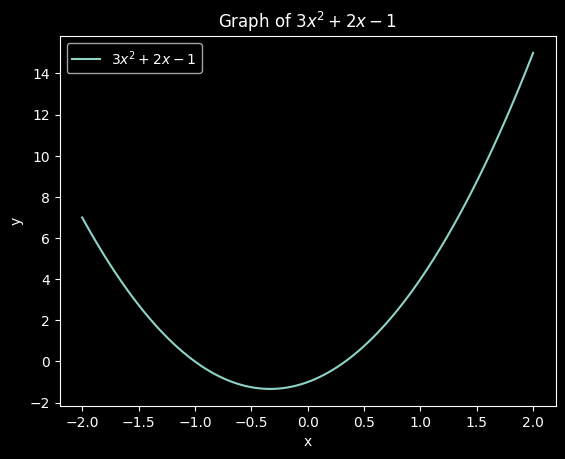

In [100]:
# graphing a polynomial using matplotlib
import matplotlib.pyplot as plt

p = np.poly1d([3, 2, -1])
x = np.linspace(-2, 2, 100)
y = p(x)

fig = plt.figure()
plt.plot(x, y, label=r"$3x^2 + 2x - 1$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.title(r"Graph of $3x^2 + 2x - 1$")
plt.show()
plt.close(fig)

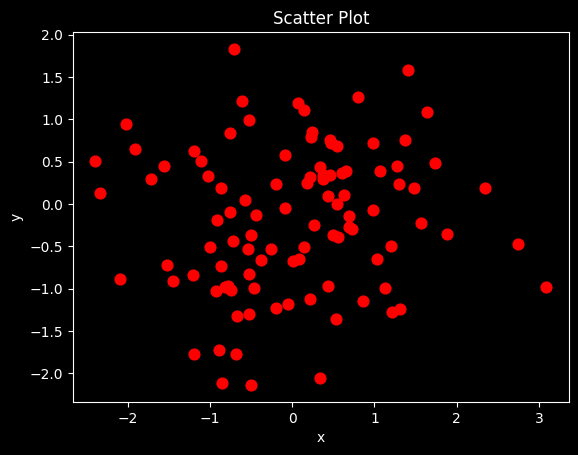

In [101]:
# graphing scatter plots using matplotlib
x = np.random.randn(100)
y = np.random.randn(100)

fig = plt.figure()
plt.scatter(x, y, color="r", marker="o", s=60)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot")
plt.show()
plt.close(fig)

<Figure size 640x480 with 0 Axes>

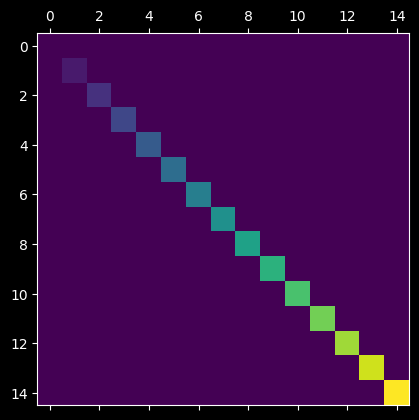

In [102]:
a = np.diag(range(15))

fig = plt.figure()
plt.matshow(a)
# plt.imshow(a, cmap="hot")
# plt.colorbar()
plt.show()
plt.close(fig)

In [103]:
from PIL import Image

# import urllib.request
# urllib.request.urlretrieve(
#     "https://upload.wikimedia.org/wikipedia/commons/4/46/Plac_Wilsona_Warsaw_2022_aerial.jpg",
#     "todays_picture.png",
# )

img = Image.open("todays_picture.png")
image_array = np.array(img)
print(image_array.shape)

(2736, 3648, 3)


### Symbolic Computation with SymPy

SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.

In [104]:
import sympy as sp
from sympy.abc import x, y, z


# x, y, z = sp.symbols("x y z")

expr = sp.cos(x) + 1
expr.subs(x, y)
# expr.subs(x, 0)

cos(y) + 1

In [105]:
# multiple substitutions
expr = x**3 + 4 * x * y - z
expr.subs([(x, 2), (y, 4), (z, 0)])

40

In [106]:
expr = x**4 - 4 * x**3 + 4 * x**2 - 2 * x + 3
replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]
expr.subs(replacements)

-4*x**3 - 2*x + y**4 + 4*y**2 + 3

In [107]:
# converting strings to sympy expressions
str_expr = "x**2 + 3*x - 1/2"
expr = sp.sympify(str_expr)

expr

x**2 + 3*x - 1/2

In [108]:
# evaluating expressions
expr = sp.sqrt(8)
# expr = sp.pi
expr
# expr.evalf()

2*sqrt(2)

In [109]:
# evaluating expressions with precision
one = sp.cos(1) ** 2 + sp.sin(1) ** 2
# (one - 1).evalf()
(one - 1).evalf(chop=True)

0

In [110]:
# using lambdify to convert sympy expressions to numerical functions
a = np.arange(10)
expr = sp.sin(x)
# expr.subs(x, a)
f = sp.lambdify(x, expr, "numpy")
f(a)


array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [111]:
# simplifying expressions
expr = sp.sin(x) ** 2 + sp.cos(x) ** 2
# sp.simplify(expr)
# expr.simplify()
expr

sin(x)**2 + cos(x)**2

In [112]:
sp.simplify((x**3 + x**2 - x - 1) / (x**2 + 2 * x + 1))

x - 1

In [113]:
sp.simplify(sp.gamma(x) / sp.gamma(x - 2))

(x - 2)*(x - 1)

In [114]:
# polynomial simplification is factoring
sp.simplify(x**2 + 2 * x + 1)
# sp.factor(x**2 + 2 * x + 1)
# sp.factor(x**2 * z + 4 * x * y * z + 4 * y**2 * z)
sp.factor_list(x**2 * z + 4 * x * y * z + 4 * y**2 * z)

(1, [(z, 1), (x + 2*y, 2)])

In [115]:
# expanding expressions
# sp.expand((x + 2) * (x - 3))
sp.expand((x + 1) * (x - 2) - (x - 1) * x)

-2

In [116]:
# expanding will also work with trigonometric functions
sp.expand((sp.cos(x) + sp.sin(x)) ** 2)
sp.factor(sp.cos(x) ** 2 + 2 * sp.cos(x) * sp.sin(x) + sp.sin(x) ** 2)

(sin(x) + cos(x))**2

In [117]:
sp.trigsimp(sp.sin(x) ** 4 - 2 * sp.cos(x) ** 2 * sp.sin(x) ** 2 + sp.cos(x) ** 4)

cos(4*x)/2 + 1/2

In [118]:
sp.expand_trig(sp.tan(2 * x))

2*tan(x)/(1 - tan(x)**2)

In [119]:
x, y = sp.symbols("x y", positive=True)
a, b = sp.symbols("a b", real=True)

# simplifying expressions with assumptions
# sp.sqrt(x**2)
# sp.powsimp(x**a * x**b)
sp.powsimp(x**a * y**a)

(x*y)**a

In [120]:
x, y = sp.symbols("x y", positive=True)
n = sp.symbols("n", real=True)

sp.expand_log(sp.ln(x * y))
# sp.expand_log(sp.log(x**n))
# sp.logcombine(sp.log(x) + sp.log(y))

log(x) + log(y)

In [121]:
x, y, z = sp.symbols("x y z")
k, m, n = sp.symbols("k m n")

sp.factorial(n)
# sp.binomial(n, k)
# sp.gamma(z)

factorial(n)

In [122]:
# n = sp.symbols("n", integer=True, positive=True)
sp.tan(x).rewrite(sp.cos)
# sp.factorial(x).rewrite(sp.gamma)
# sp.gamma(x + 1).rewrite(sp.factorial)

cos(x - pi/2)/cos(x)

In [123]:
# derivatives
f = sp.Function("f")(x)

f.diff(x)
# sp.diff(f, x)
# f.diff(x, x)
# f.diff(x, 2)

Derivative(f(x), x)

In [124]:
expr = sp.exp(x * y * z)
# sp.diff(expr, x, y, y, z, z, z, z)

# to create an unevaluated derivative, use sp.Derivative
deriv = sp.Derivative(expr, x, y, y, z, 4)
# deriv
deriv.doit()

x**3*y**2*(x**3*y**3*z**3 + 14*x**2*y**2*z**2 + 52*x*y*z + 48)*exp(x*y*z)

In [125]:
# integrals

# indefinite integrals
f = sp.Function("f")(x)

f.integrate(x)
# sp.integrate(f, x)

Integral(f(x), x)

In [127]:
# definite integrals
f = sp.exp(-x)

sp.integrate(f, (x, 0, 1))
# sp.integrate(f, (x, 0, sp.oo))

1 - exp(-1)

In [128]:
expr = sp.Integral(sp.log(x) ** 2, x)

expr
# expr.doit()

Integral(log(x)**2, x)

In [132]:
integral = sp.Integral(sp.sqrt(2) * x, (x, 0, 1))

# integral
# integral.doit()
integral.evalf(50)

0.70710678118654752440084436210484903928483593768847

In [133]:
# limits
sp.limit(sp.sin(x) / x, x, 0)

1

In [135]:
expr = x**2 / sp.exp(x)

expr.subs(x, sp.oo)
# sp.limit(expr, x, sp.oo)

0

In [136]:
expr = sp.Limit((sp.cos(x) - 1) / x, x, 0)
expr
# expr.doit()

Limit((cos(x) - 1)/x, x, 0, dir='+')

In [140]:
# series expansion
expr = sp.exp(sp.sin(x))
# sp.series(expr, x, 0, 6)
expr.series(x, 0, 6).removeO()

-x**5/15 - x**4/8 + x**2/2 + x + 1

In [139]:
x + x**3 + x**6 + sp.O(x**4)

x + x**3 + O(x**4)

In [141]:
sp.exp(x - 6).series(x, x0=6)

-5 + (x - 6)**2/2 + (x - 6)**3/6 + (x - 6)**4/24 + (x - 6)**5/120 + x + O((x - 6)**6, (x, 6))